In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)

In [2]:
def plot_walk(data, gap=0.15, head_width=0.05, head_length=0.1, dx=0.05, save=None,):
    """
    Plots a simple random walk of length n
    
    Args:
        data (dict): a dictionary with keys 'x' and 'y' 
            containing the x and y coordinates of the walk, 
            along with the number of steps taken 'n', and 
            an optional key 'early_stop' indicating whether
            the walk was stopped early for any reason.
        
        gap (float): the fraction of a single arrow to 
            remove from the beginning and end of each arrow, 
            for visualization purposes.
        
        head_width (float): the width of the arrow head
        
        head_length (float): the length of the arrow head
        
        dx (float): the distance to shift the step up and
        down to avoid overlapping arrows
        
        save (str): the filename to save the plot to (optional)
        
    Returns:
        Plot of a simple random walk of length n
    """
    ZBOTTOM, ZTOP = -999, 999
    
    x = data['x']
    y = data['y']
    
    show_early_finish = data.get('early_stop', False)
    
    plt.figure(figsize = (8, 8), dpi=100)
    plt.scatter(0, 0, c='limegreen', marker='s', s=50, label = 'Start', zorder=ZBOTTOM)
    plt.scatter(x[-1], y[-1], c='orangered', marker='s', s=50, label = 'End', zorder=ZBOTTOM)
    
    # plot each step as an arrow
    for i in range(1,len(x)):
        if (x[i]-x[i-1]) == 0:     # |
            yshift = 0
        elif (x[i]-x[i-1]) > 0:    # -->
            yshift = dx
        else:                      # <--
            yshift = -dx
            
        if (y[i]-y[i-1]) == 0:     # --
            xshift = 0
        elif (y[i]-y[i-1]) > 0:    # ^
            xshift = dx
        else:                      # v
            xshift = -dx
        
        diff_x = (x[i] - x[i-1])
        diff_y = (y[i] - y[i-1])

        plt.arrow(x[i-1]+diff_x*gap+xshift,
                y[i-1]+diff_y*gap+yshift,
                diff_x*(1-2*gap), diff_y*(1-2*gap),
                width = 0.01,
                color = 'k',
                head_width=head_width, 
                head_length=head_length,
                length_includes_head=True,
                zorder=ZTOP)
        
        
    # plot the lattice
    xmin, xmax = int(min(x)), int(max(x)+1)
    ymin, ymax = int(min(y)), int(max(y)+1)
    xlen = xmax - xmin
    ylen = ymax - ymin
    if xlen > ylen:
        to_add = (xlen - ylen)//2
        ymin -= to_add
        ymax += to_add
    else:
        to_add = (ylen - xlen)//2
        xmin -= to_add
        xmax += to_add

    for i in range(int(xmin-0.1*xlen), int(xmax+0.1*xlen+1)):
        plt.axvline(i, c='grey', lw=0.5, zorder=ZBOTTOM-1, alpha=0.5)
    for i in range(int(ymin-0.1*ylen), int(ymax+0.1*ylen+1)):
        plt.axhline(i, c='grey', lw=0.5, zorder=ZBOTTOM-1, alpha=0.5)

    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.axis('off')    

    plt.legend(fontsize=15, framealpha=1, ncols=2, loc='upper right')
    
    txt = f'$N = {len(x)-1}$'
    if show_early_finish:
        txt += f'\nFAILED ($\\neq{data["n"]}$)'
    
    plt.text(0.05, 0.935, txt, fontsize=20, transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=1, edgecolor='lightgrey', boxstyle='round,pad=0.2',
                       ))
    
    if save:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

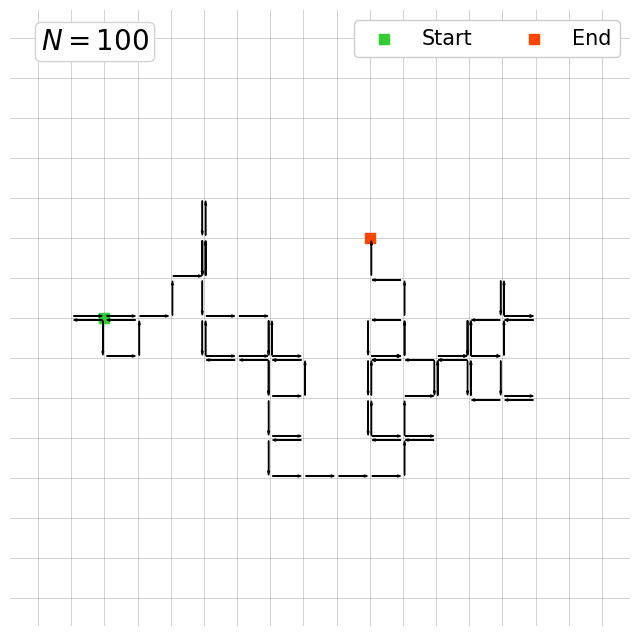

In [3]:
def simpl_rnd_walk(n):
    """
    Generates a simple random walk of length n:
    
    1. Start at the origin (0,0)
    2. At each step, move one unit in a random direction
    3. Repeat until n steps have been taken
    
    Args:
        n (int): the length of the walk
    Returns:
        (x, y) (list, list): Random walk of length n
    """
    x, y = [0], [0]
    deltas = [(1,0), (0,1), (-1,0), (0,-1)] #possible directions for the 2D lattice
    for _ in range(n):
        dx, dy = deltas[rng.integers(0,4)]   #direction chosen at random
        x.append(x[-1] + dx)
        y.append(y[-1] + dy)
    return dict(x=x, y=y, n=n)

plot_walk(simpl_rnd_walk(100), dx=0.05, gap=0.07)

In [4]:
def is_valid(x, y):
    """
    Checks if the walk is non-intersecting by checking
    for any duplicates (x,y) coordinates.
    
    Args:
        x (list): x-coordinates of the walk
        y (list): y-coordinates of the walk
    Returns:
        True if the walk is valid, False otherwise
    """
    return len(x) == len(set(zip(x, y)))

In [5]:
def naive_self_avoiding_walk(n):
    """
    Generates a self-avoiding walk of length n
    
    Args:
        n (int): the length of the walk
    Returns:
        (x, y) (list, list): Self-avoiding walk of length n
    """
    x, y = [0], [0]
    possible_steps = [(1,0), (0,1), (-1,0), (0,-1)]
    
    is_stuck = False
    while not is_stuck:
        if len(x)-1 == n: break
        
        feasible_steps = []
        for step in possible_steps:
            if (x[-1]+step[0], y[-1]+step[1]) not in zip(x, y):
                feasible_steps.append(step)
        
        if len(feasible_steps) > 0:
            dx, dy = feasible_steps[rng.integers(0,len(feasible_steps))]
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
        else:
            is_stuck = True
    return dict(x=x, y=y, n=n, early_stop=is_stuck)

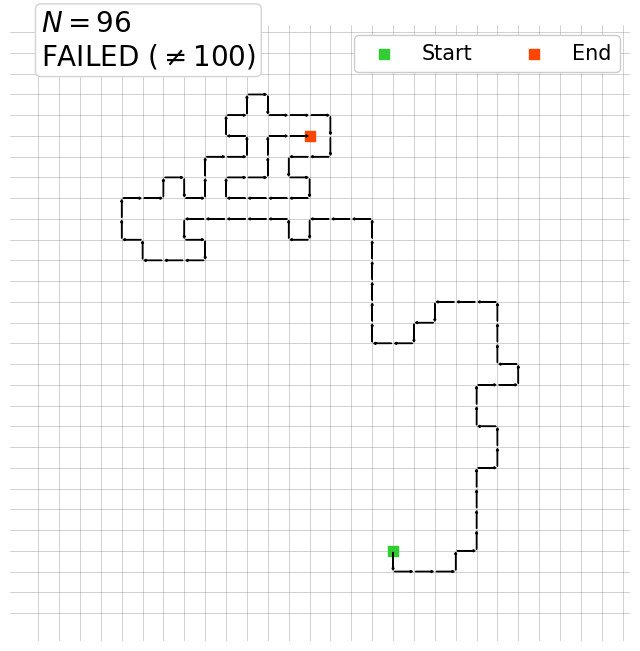

In [6]:
plot_walk(naive_self_avoiding_walk(100), dx=0, gap=0.07, head_width=0.1)

### [TODO] Implementing pivot

Possible $D_4$ matrices [[1]](https://en.wikipedia.org/wiki/Dihedral_group):

<img src="D4.svg">

In [7]:
D4 = np.array([
    [[1,0],
     [0,1]],
    
    [[0,-1],
     [1,0]],
    
    [[-1,0],
     [0,-1]],
    
    [[0,1],
     [-1,0]],
    
    [[1,0],
     [0,-1]],
    
    [[0,1],
     [1,0]],
    
    [[-1,0],
     [0,1]],
    
    [[0,-1],
     [-1,0]]])